## Problem 1: Polynomial Regression (25%)

In this problem, you will implement the function for second-order polynomial regression (quadratic equation) of (a) single variable and (b) two variable from scratch using numpy.
You can find the detials of the solution using least square error method in the course slide.





In [2]:
# import the necessary library
import numpy as np
import matplotlib.pyplot as plt

(a) Fitting Quadratic Function with Single Variable

The equation shown below is taken from the course slide. Please reference the course slide for more details.

You will need to constuct the **B** matrix and **c** vector to solve the **a** in your code.

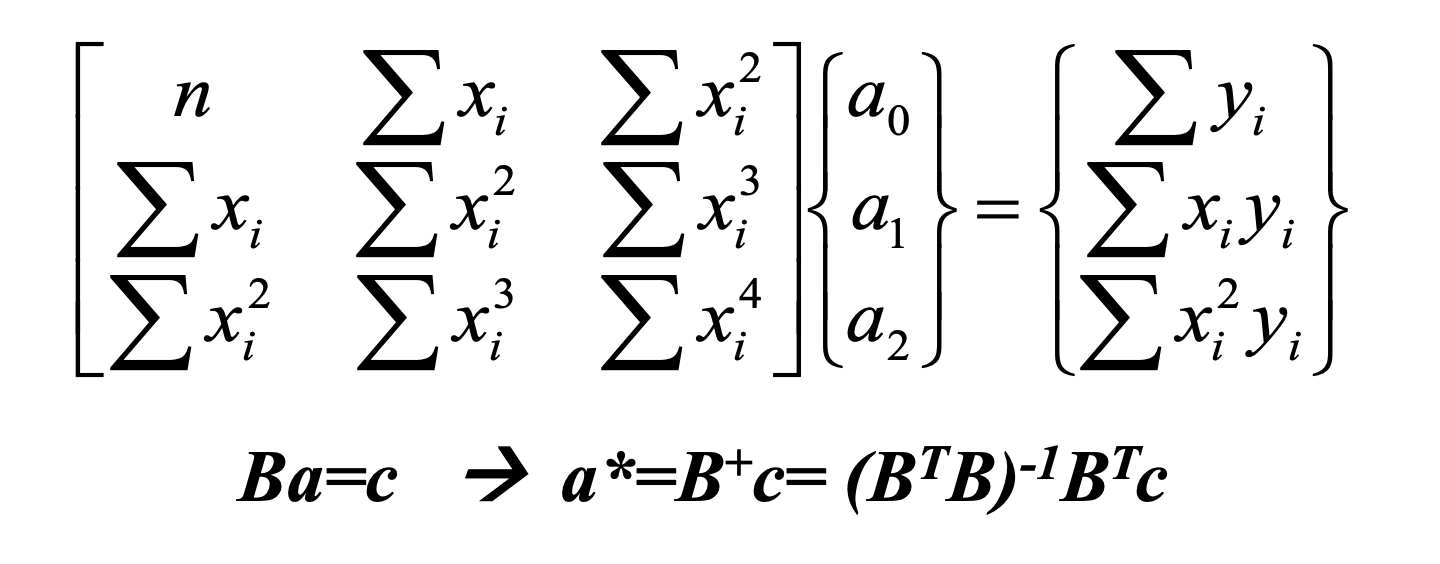

First, we generate some data for us to regress the function and evaluate the regression result.

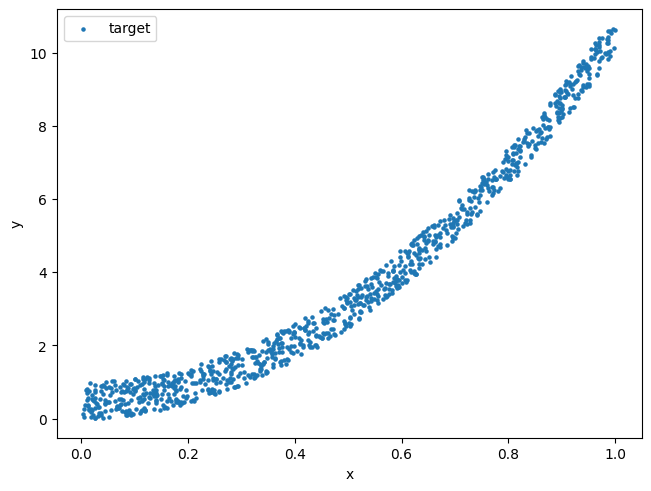

In [ ]:
# Generate data to fit the quadratic function
np.random.seed(42)
# x, y are the data you will use to fit the quadratic function
x = np.random.rand(1000, 1)
y = 10 * x**2 + np.random.rand(1000, 1)
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x, y, s=5, label='target')
ax.legend()

In [ ]:
# todo: implement the function to find a vector (a0, a1, a2)
def fit_one_variable(x, y):
    #print (x[0])
    #a = np.array([[1000, x[0], x[0]], [x[0], x[0], x[0]], [x[0], x[0], x[0]]])
    sum_of_elements = np.sum(x)
    sum_of_squares = np.sum(x**2)
    sum_of_cube = np.sum(x**3)
    sum_of_quard = np.sum(x**4)
    #print (sum_of_elements)
    #print (sum_of_squares)
    #print (sum_of_cube)
    #print (sum_of_quard)
    B = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
    B [0,0] = 1000
    B [0,1] = sum_of_elements
    B [0,2] = sum_of_squares

    B [1,0] = sum_of_elements
    B [1,1] = sum_of_squares
    B [1,2] = sum_of_cube

    B [2,0] = sum_of_squares
    B [2,1] = sum_of_cube
    B [2,2] = sum_of_quard

    C = np.array([[1.0], [4.0], [7.0]])
    sum_of_output = np.sum(y)
    sum_of_input_output = np.sum(x*y)
    sum_of_inputSquare_output = np.sum(x*x*y)

    C [0] = sum_of_output
    C [1] = sum_of_input_output
    C [2] = sum_of_inputSquare_output

    #print (B)
    #print (C)

    BTranspose = np.transpose(B)
    #print (BTranspose)

    model_coefficient  = np.dot(np.dot(np.linalg.pinv(np.dot(BTranspose,B)),BTranspose),C)
    #print (model_coefficient)
    return model_coefficient

# todo: implement the function to predict y given x and the coefficient a obtained from regression
def pred_mat(x, a):
    y_Predicted = a [0] + a [1]* x + a [2] * x**2
    fig, ax = plt.subplots(1, 1, constrained_layout=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter(x, y_Predicted, s=5, label='predicted', color='red')
    ax.scatter(x, y, s=5, label='target', color='blue')
    ax.legend()


[[ 0.49986686]
 [-0.01527067]
 [10.04495248]]


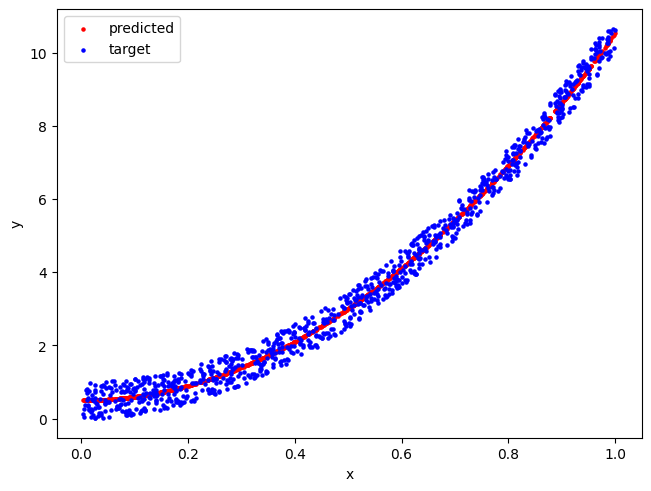

In [ ]:
# todo:
# 1. fit the second order polynomial function
model_coefficient = fit_one_variable(x,y)
# 2. print the estimated coefficient rounded to two decimal places
print (model_coefficient)
# 3. make the prediction using x, and draw the predicted y and target y on the same figure
pred_mat(x,model_coefficient)


(b) Fitting Two-variable Quadratic Function

In the class, Professor Hwang talked about how to do the second order polynomial regression of one variable. Now, we should follow the same way to do the second order polynomial regression of two vairable.


The equation shown below solves the coefficient **a** in the second order polynomial function of one variable, and can be obtained from taking the derative of sum of squares of the residual with respect to each coefficient a (a0, a1, a2). (See the course slide for more details)

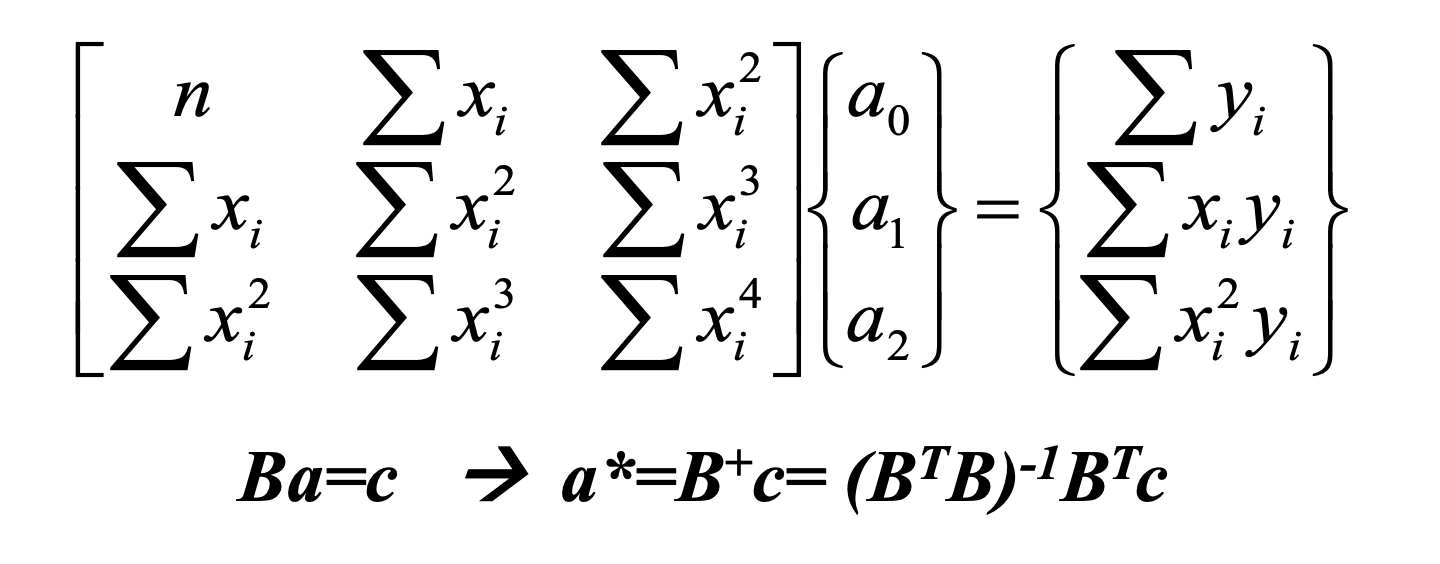

1. Now, constuct the equation (Ba=c) using a similar way for second order polynomial function of two variables. Please follow the steps below to write down the equation, Ba=c. (5%)

- Step1: Write Sr = sum of square of residual
- Step2: Take the derative of Sr with respect to different coefficient term (a0, a1, ..., a5)
- Step3: Organize six equstion from Step2 in the matrix form (Ba=c)
- a0, a1, ..., a5 are the coefficients of two variable second order polynomial function. e is the residual





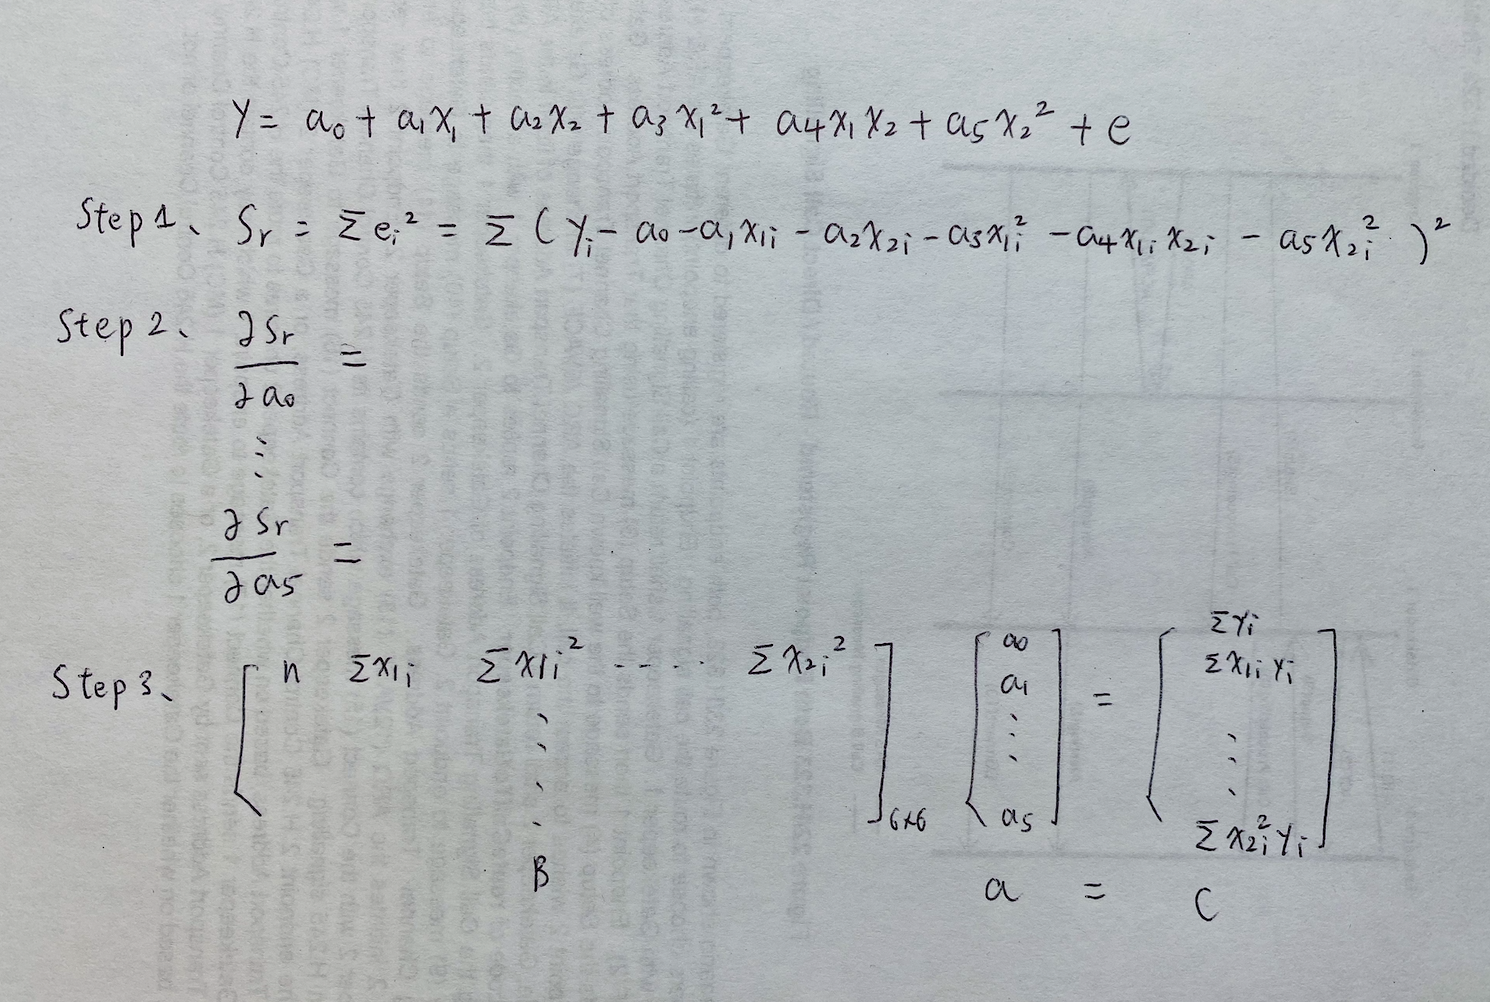

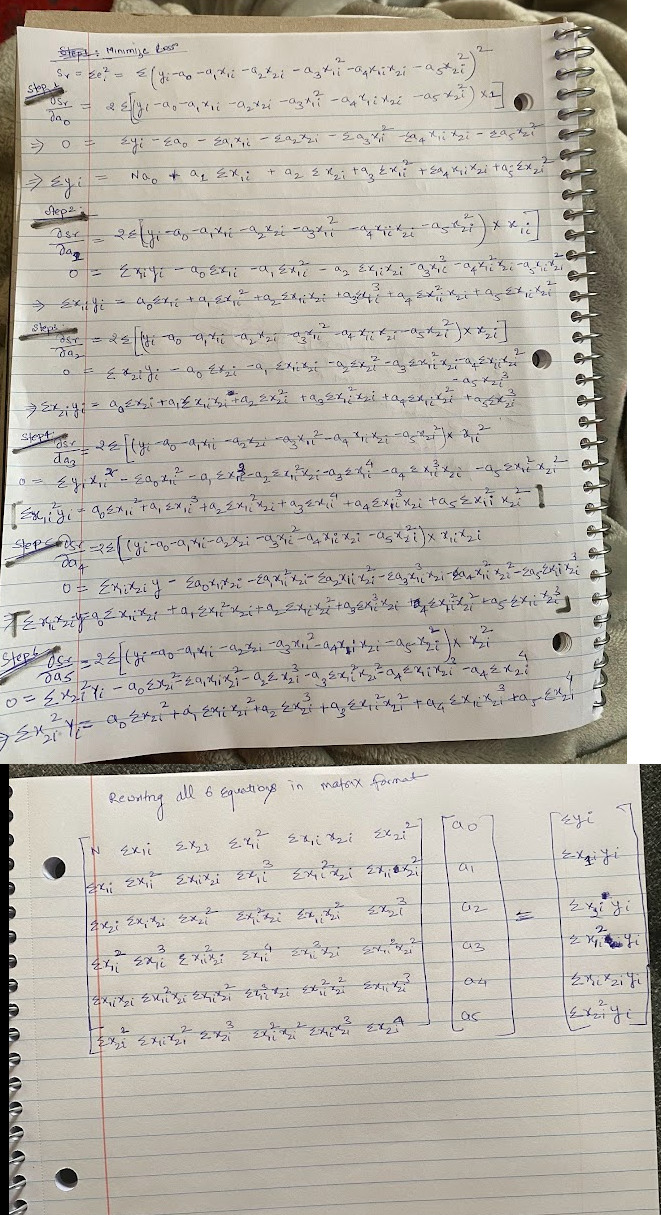

Now that we have **B**, **a** and **c**, we can solve **a** using the equation below similar to how we solve **a** for single variable polynomial regression.

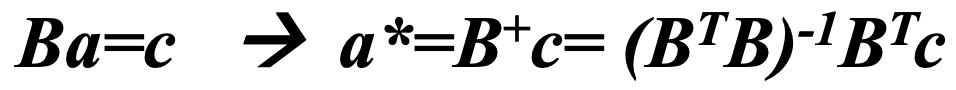

2. Implement the function to solve two variable second order polynomial regression using **B, a, c** from question b1.

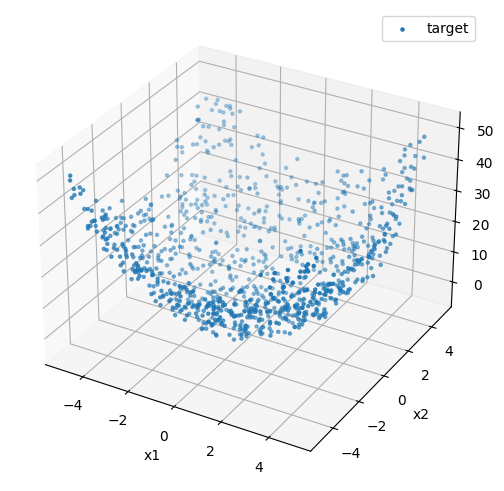

In [3]:
# Generate data to fit the quadratic function
np.random.seed(42)
x1 = np.random.rand(1000, 1) * 10. - 5.
x2 = np.random.rand(1000, 1) * 10. - 5.
y = x1**2 + x2**2  + (np.random.rand(1000, 1) - 0.5) * 10.
fig, ax = plt.subplots(1, 1, constrained_layout=True, subplot_kw={'projection': '3d'})
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter3D(x1, x2, y, s=5, label='target')
ax.legend()

In [19]:
# todo: implement the function to find the coefficient vector (a0, a1, a2, a3, a4, a5)
def fit_two_variable(x1, x2, y):

    sum_of_x1 = np.sum(x1)
    sum_of_x2 = np.sum(x2)

    sum_of_square_x1 = np.sum(x1**2)
    sum_of_square_x1_x2 = np.sum(x1*x2)
    sum_of_square_x2 = np.sum(x2**2)

    sum_of_cube_x1 = np.sum(x1**3)
    sum_of_cube_x1_x2 = np.sum(x1*x1*x2)
    sum_of_cube_x2_x1 = np.sum(x2*x2*x1)
    sum_of_cube_x2 = np.sum(x2**3)

    sum_of_quard_x1 = np.sum(x1**4)
    sum_of_quard_x1_x2 = np.sum(x1*x1*x1*x2)
    sum_of_quard_x1_x2_2 = np.sum(x2*x2*x1*x1)
    sum_of_quard_x2_x1  = np.sum(x2*x2*x2*x1)
    sum_of_quard_x2 = np.sum(x2**4)

    sum_of_y = np.sum(y)
    sum_of_y_x1 = np.sum(y*x1)
    sum_of_y_x2 = np.sum(y*x2)
    sum_of_y_x1_Square = np.sum(y*x1*x1)
    sum_of_y_x1_x2 = np.sum(y*x1*x2)
    sum_of_y_x2_Square = np.sum(y*x2*x2)
    # init the matrix with float values 6*6 dimensions
    B = np.array([[1.0, 2.0, 3.0,4.0,5.0,6.0], [1.0, 2.0, 3.0,4.0,5.0,6.0], [1.0, 2.0, 3.0,4.0,5.0,6.0],
                  [1.0, 2.0, 3.0,4.0,5.0,6.0], [1.0, 2.0, 3.0,4.0,5.0,6.0], [1.0, 2.0, 3.0,4.0,5.0,6.0]])
    # populate with calcualated value from equation
    #print (B.shape)
    B [0,0] = 1000
    B [0,1] = sum_of_x1
    B [0,2] = sum_of_x2
    B [0,3] = sum_of_square_x1
    B [0,4] = sum_of_square_x1_x2
    B [0,5] = sum_of_square_x2

    B [1,0] = sum_of_x1
    B [1,1] = sum_of_square_x1
    B [1,2] = sum_of_square_x1_x2
    B [1,3] = sum_of_cube_x1
    B [1,4] = sum_of_cube_x1_x2
    B [1,5] = sum_of_cube_x2_x1

    B [2,0] = sum_of_x2
    B [2,1] = sum_of_square_x1_x2
    B [2,2] = sum_of_square_x2
    B [2,3] = sum_of_cube_x1_x2
    B [2,4] = sum_of_cube_x2_x1
    B [2,5] = sum_of_cube_x2

    B [3,0] = sum_of_square_x1
    B [3,1] = sum_of_cube_x1
    B [3,2] = sum_of_cube_x1_x2
    B [3,3] = sum_of_quard_x1
    B [3,4] = sum_of_quard_x1_x2
    B [3,5] = sum_of_quard_x1_x2_2

    B [4,0] = sum_of_square_x1_x2
    B [4,1] = sum_of_cube_x1_x2
    B [4,2] = sum_of_cube_x2_x1
    B [4,3] = sum_of_quard_x1_x2
    B [4,4] = sum_of_quard_x1_x2_2
    B [4,5] = sum_of_quard_x2_x1

    B [5,0] = sum_of_square_x2
    B [5,1] = sum_of_cube_x2_x1
    B [5,2] = sum_of_cube_x2
    B [5,3] = sum_of_quard_x1_x2_2
    B [5,4] = sum_of_quard_x2_x1
    B [5,5] = sum_of_quard_x2

    C = np.array([[1.0], [4.0], [7.0],[1.0], [4.0], [7.0]])
    sum_of_output = np.sum(y)
    sum_of_x1_output = np.sum(y*x1)
    sum_of_x2_output = np.sum(y*x2)
    sum_of_x2_square_output = np.sum(y*x2*x2)
    sum_of_x1_square_output = np.sum(y*x1*x1)
    sum_of_x1_x2_square_output = np.sum(y*x1*x2)

    C [0] = sum_of_output
    C [1] = sum_of_x1_output
    C [2] = sum_of_x2_output
    C [3] = sum_of_x1_square_output
    C [4] = sum_of_x1_x2_square_output
    C [5] = sum_of_x2_square_output

    BTranspose = np.transpose(B)
    #print (BTranspose)

    model_coefficient  = np.dot(np.dot(np.linalg.pinv(np.dot(BTranspose,B)),BTranspose),C)
    #print (model_coefficient)
    return model_coefficient

# todo: implement the function to make prediction
def pred_two_var(a, x1, x2):
    #y_Predicted = a [0] + a [1]* x + a [2] * x**2
    y_Predicted = a[0] + a[1] * x1 + a[2]*x2 + a[3]*x1*x1+ a[4]* x1*x2 +a[5]*x2*x2
    fig, ax = plt.subplots(1, 1, constrained_layout=True, subplot_kw={'projection': '3d'})
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.scatter3D(x1, x2, y, s=5, label='target', color = 'blue')
    ax.scatter3D(x1, x2, y_Predicted, s=5, label='predicted', color = 'red')

    ax.legend()

[[-0.03166197]
 [ 0.01351184]
 [ 0.02807114]
 [ 1.00147913]
 [ 0.00654568]
 [ 1.00478677]]


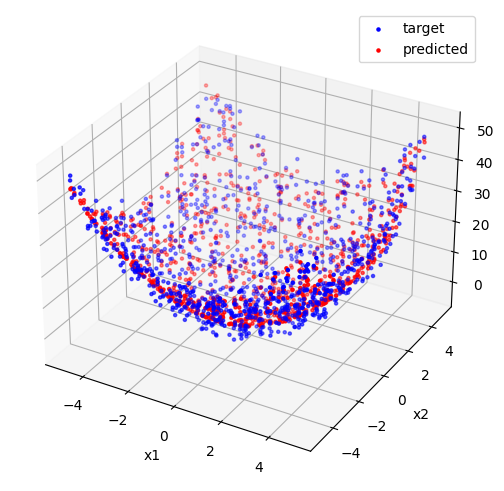

In [20]:
# todo:
# 1. fit the second order polynomial function
model_coefficient = fit_two_variable(x1, x2, y)
# 2. print the estimated coefficient rounded to two decimal places
print (model_coefficient)
# 3. make the prediction using x1 and x2, and draw the predicted y and target y on the same figure
pred_two_var(model_coefficient, x1, x2)

## Problem 2: Classification on Digital Images Using Traditional Machine Learning (50%)

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the course Canvas (https://canvas.uw.edu/files/110042518/download?download_frd=1) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [ ]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [ ]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load MNIST dataset from your Google Drive.

In [ ]:
from scipy.io import loadmat
mnist = loadmat('gdrive/MyDrive/Colab Notebooks/mnist.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.
traindata = mnist['traindata']
trainlabels = mnist['trainlabels'].ravel()
testdata = mnist['testdata']
testlabels = mnist['testlabels'].ravel()

print(traindata.shape)
print(trainlabels.shape)
print(testdata.shape)
print(testlabels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']` with labels called `mnist['testlabels']`.

Visualize an image with label.

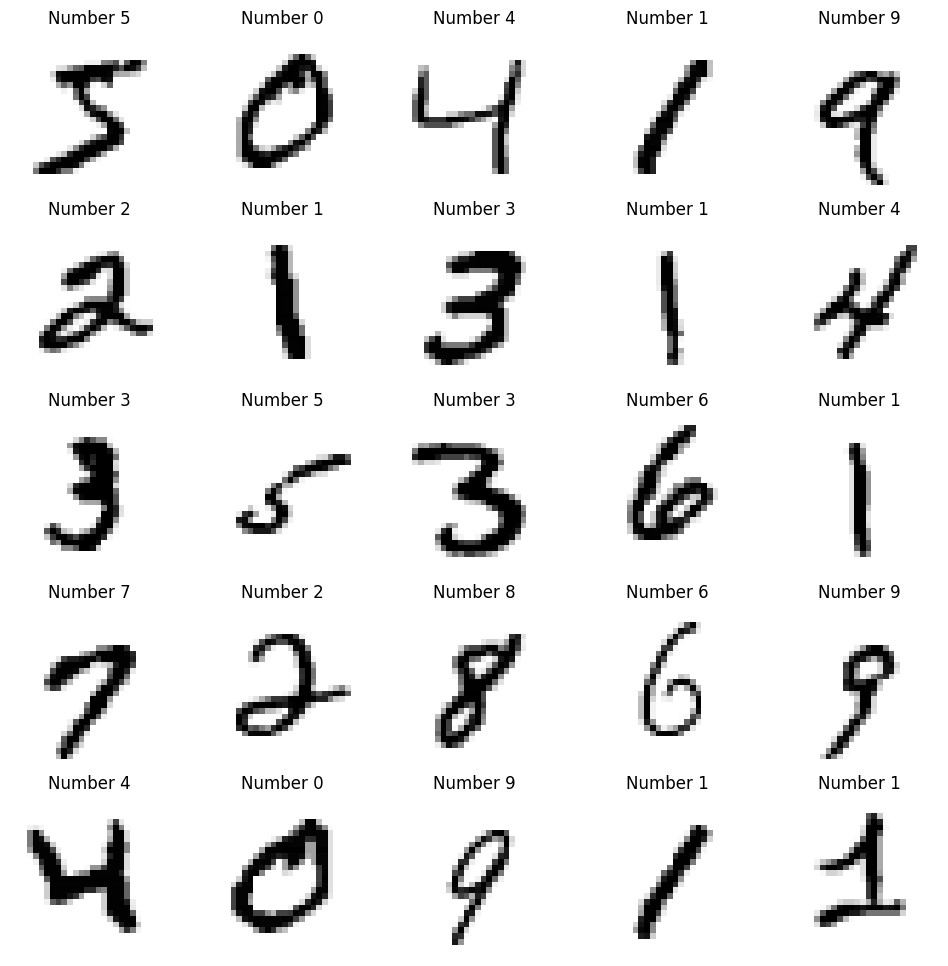

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA on MNIST

Implement PCA **from scratch** on the whole MNIST dataset. Implement the PCA to select a reduced dimension k which keeps 30% information after the reduction.


In [ ]:
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
# TODO: implement PCA

def PCA(training_data, testing_data):
  #print (training_data.shape)
  dataset = np.concatenate((training_data, testing_data), axis = 0)
  dataset = StandardScaler().fit_transform(dataset)
  covariance_matrix = np.cov(dataset, rowvar = 0)
  eigenvalues, eigenvectors  = LA.eig(covariance_matrix)
  # Maximum eigne Value , get indices so that we can get corresponding eigen vecotr
  indices_sorted = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[indices_sorted]
  eigenvectors = eigenvectors[:,indices_sorted]
  # keep 30 % of top dimentions
  k =12
  eigenvectors_topN = eigenvectors[:, :k]
  # Project data onto the reduced-dimensional space
  reduced_training_data = training_data.dot(eigenvectors_topN)
  reduced_testing_data = testing_data.dot(eigenvectors_topN)

  print (f"Test Data Size {reduced_testing_data.shape}")
  print (f"Training Data Size {reduced_training_data.shape}")
  return reduced_training_data, reduced_testing_data

In [ ]:
#reduced_training_data, reduced_test_data =
reduced_training_data, reduced_test_data =  PCA(traindata , testdata)

Test Data Size (10000, 12)
Training Data Size (60000, 12)


### (c) Logistic Regression
Now, we have reduced our data to k dimension. Please implement a logistic regression model taking k-dimensional data to classify the hand written digits and train it with max_iter=1000. You are allowed to use libraries like scikit-learn. Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Train a logistic regression model for multi-class classification
 # normalize data
reduced_training_data = StandardScaler().fit_transform(reduced_training_data)
reduced_test_data = StandardScaler().fit_transform(reduced_test_data)

model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(reduced_training_data, trainlabels)


LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
from sklearn import metrics


# todo: print the accuracy on the given test data and labels.
y_pred = model.predict(reduced_test_data)

print (f"Reduced Test Data Size {reduced_test_data.shape}")
print (f"Predicated lebel Data Size {y_pred.shape}")

# Calculate accuracy
accuracy = metrics.accuracy_score(testlabels, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Reduced Test Data Size (10000, 12)
Predicated lebel Data Size (10000,)
Accuracy: 80.81%


### (d) Support Vector Machine (SVM) Classifier

Lets build a SVM Classifier for MNIST dataset. Here you also should use the representative data (after PCA) for training and inference. For more details about using SVM, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Implement a SVM classifier using the scikit-learn package: sklearn.svm.SVC with L2 regularization parameters C = 1.0, kernel type ‘linear’.

In [ ]:
from sklearn.svm import SVC
# todo
svm_classifier = SVC(C=1.0, kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(reduced_training_data, trainlabels)



SVC(kernel='linear')


Evaluate the classification accuracy on the validation set.

In [ ]:
# todo: print the accuracy on the given test data and labels.
# Make predictions on the test data
y_pred = svm_classifier.predict(reduced_test_data)

# Calculate accuracy
accuracy = metrics.accuracy_score(testlabels, y_pred)
print(f"Linear Kernel C =1 Accuracy: {accuracy*100:.2f}%")

Linear Kernel C =1 Accuracy: 94.49%



Try using a different kernel type, change the kernal from ‘linear’ to ‘rbf’ (radial basis function) and evaluate the classification accuracy on the validation set. Which one (‘linear’ or ‘rbf’) can give you higher accuracy?

In [ ]:
# todo
svm_classifier = SVC(C=1.0, kernel='rbf')

# Train the classifier on the training data
svm_classifier.fit(reduced_training_data, trainlabels)

y_pred = svm_classifier.predict(reduced_test_data)

# Calculate accuracy
accuracy = metrics.accuracy_score(testlabels, y_pred)
print(f"Kernel RBF C=1 Accuracy: {accuracy*100:.2f}%")

Kernel RBF C=1 Accuracy: 94.49%


Fix the kernel type to be ‘rbf’ and try different sets of regularization parameters C ∈ {0. 1, 0. 5, 1. 0, 5. 0, 10. 0}, and report all the classification accuracies on the validation set. What’s the meaning of changing the C here? Which C in your case can give your the best accurarcy?

Compared with the logistic regression, which method performs better? Please briefly explain it.

In [ ]:
# todo
Cparams = [0.1, 0.5, 1.0, 5.0, 10.0]
accuracies = []

for c in Cparams:
    svm_classifier = SVC(C=c, kernel='rbf')

    # Train the classifier on the training data
    svm_classifier.fit(reduced_training_data, trainlabels)

    y_pred = svm_classifier.predict(reduced_test_data)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(testlabels, y_pred)
    accuracies.append(accuracy)

for i, C in enumerate(Cparams):
    print(f"C= {C} - Accuracy: {accuracies[i]*100:.2f}%")

C= 0.1 - Accuracy: 92.51%
C= 0.5 - Accuracy: 93.92%
C= 1.0 - Accuracy: 94.49%
C= 5.0 - Accuracy: 95.21%
C= 10.0 - Accuracy: 95.41%



Run your classifier on the testing set with the model which achieves the best performance on the validation dataset, and visualize some of the images with their predicted labels.


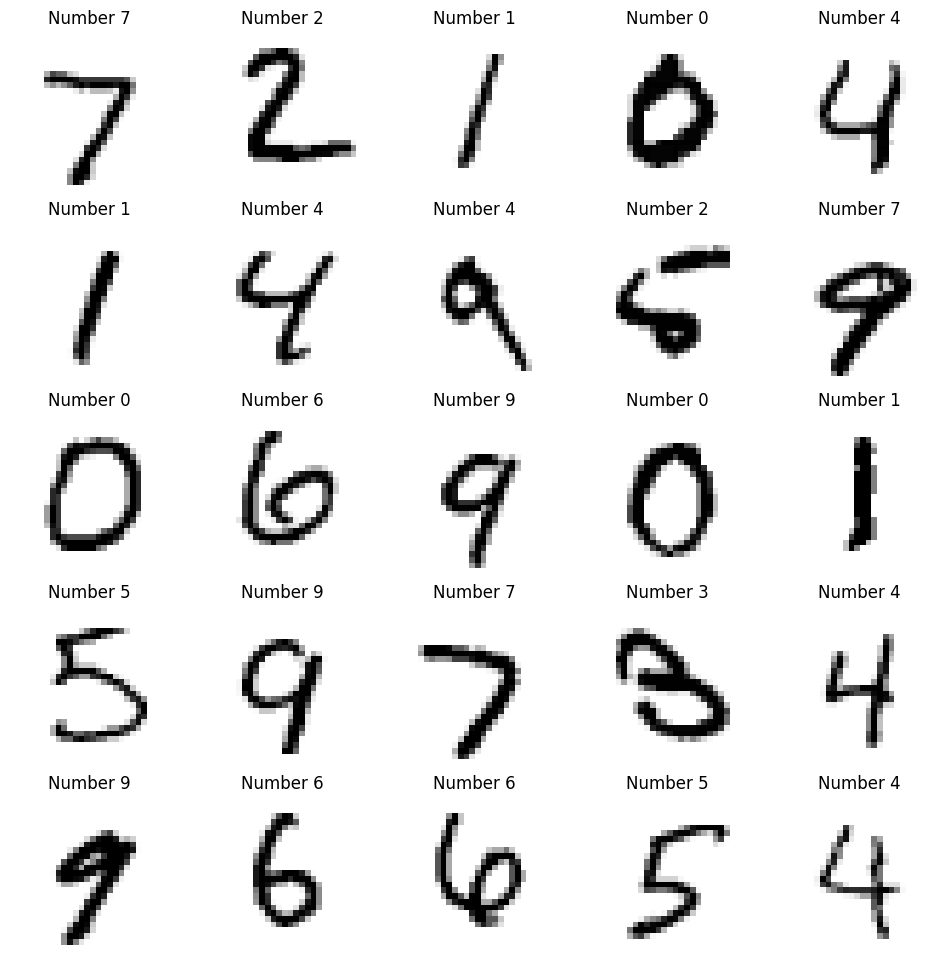

In [ ]:
# todo
import matplotlib.pyplot as plt
from matplotlib import cm

max_C = 10.0
svm_classifier = SVC(C=max_C, kernel='rbf')
svm_classifier.fit(reduced_training_data, trainlabels)
y_pred = svm_classifier.predict(reduced_test_data)

#reduced_test_data (10,000,12) , Pred 10,000
fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(testdata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(y_pred[i]))
